In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
df = pd.read_csv('../DATASET/final_data.csv',encoding='latin-1')

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [37]:
cv = CountVectorizer()
tf = TfidfVectorizer()

In [24]:
# Check for and handle missing values
df['transformed'] = df['transformed'].fillna('')  # Fill NaN with empty strings
print(f"Missing values in 'transformed' column: {df['transformed'].isna().sum()}")

Missing values in 'transformed' column: 0


In [38]:
X= tf.fit_transform(df['transformed']).toarray()

In [39]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5572, 6674))

In [40]:
Y= df['label'].values

In [41]:
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [42]:
# TRIN TEST SPLITTING

from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [45]:
# TRAINING NAIVE BAYES CLASSIFIER

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score

In [46]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()


In [47]:
GNB.fit(X_train,Y_train)
Y_pred = GNB.predict(X_test)

print(f"ACCURACY SCORE IS {accuracy_score(Y_test,Y_pred)}")
print(f"CONFUSION MATRIX-->{confusion_matrix(Y_test,Y_pred)}")
print(f"PRECISION SCORE IS-->{precision_score(Y_test,Y_pred)}")



ACCURACY SCORE IS 0.8672645739910314
CONFUSION MATRIX-->[[842 115]
 [ 33 125]]
PRECISION SCORE IS-->0.5208333333333334


In [48]:
MNB.fit(X_train,Y_train)
Y_pred2 = MNB.predict(X_test)

print(f"ACCURACY SCORE IS {accuracy_score(Y_test,Y_pred2)}")
print(f"CONFUSION MATRIX-->{confusion_matrix(Y_test,Y_pred2)}")
print(f"PRECISION SCORE IS-->{precision_score(Y_test,Y_pred2)}")

ACCURACY SCORE IS 0.957847533632287
CONFUSION MATRIX-->[[957   0]
 [ 47 111]]
PRECISION SCORE IS-->1.0


In [49]:
BNB.fit(X_train,Y_train)
Y_pred3 = BNB.predict(X_test)

print(f"ACCURACY SCORE IS {accuracy_score(Y_test,Y_pred3)}")
print(f"CONFUSION MATRIX-->{confusion_matrix(Y_test,Y_pred3)}")
print(f"PRECISION SCORE IS-->{precision_score(Y_test,Y_pred3)}")

ACCURACY SCORE IS 0.9695067264573991
CONFUSION MATRIX-->[[956   1]
 [ 33 125]]
PRECISION SCORE IS-->0.9920634920634921


In [50]:
# Collect metrics for comparison
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']

# Calculate accuracy scores
gnb_accuracy = accuracy_score(Y_test, Y_pred)
mnb_accuracy = accuracy_score(Y_test, Y_pred2)
bnb_accuracy = accuracy_score(Y_test, Y_pred3)

# Calculate precision scores
gnb_precision = precision_score(Y_test, Y_pred)
mnb_precision = precision_score(Y_test, Y_pred2)
bnb_precision = precision_score(Y_test, Y_pred3)

accuracies = [gnb_accuracy, mnb_accuracy, bnb_accuracy]
precisions = [gnb_precision, mnb_precision, bnb_precision]

# Display the metrics
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions
})

print(comparison_df)

           Model  Accuracy  Precision
0     GaussianNB  0.867265   0.520833
1  MultinomialNB  0.957848   1.000000
2    BernoulliNB  0.969507   0.992063


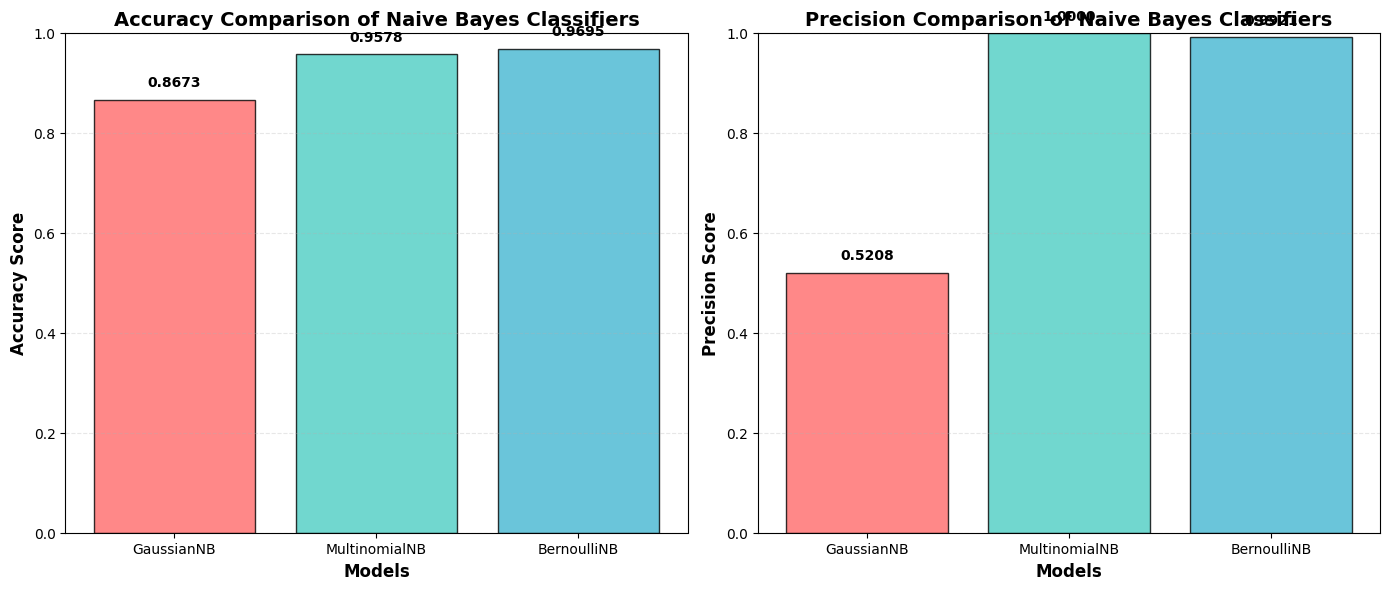

In [51]:
# Plot comparison graph
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Accuracy Comparison
ax[0].bar(models, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')
ax[0].set_xlabel('Models', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Accuracy Score', fontsize=12, fontweight='bold')
ax[0].set_title('Accuracy Comparison of Naive Bayes Classifiers', fontsize=14, fontweight='bold')
ax[0].set_ylim([0, 1])
ax[0].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, v in enumerate(accuracies):
    ax[0].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Precision Comparison
ax[1].bar(models, precisions, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8, edgecolor='black')
ax[1].set_xlabel('Models', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Precision Score', fontsize=12, fontweight='bold')
ax[1].set_title('Precision Comparison of Naive Bayes Classifiers', fontsize=14, fontweight='bold')
ax[1].set_ylim([0, 1])
ax[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, v in enumerate(precisions):
    ax[1].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

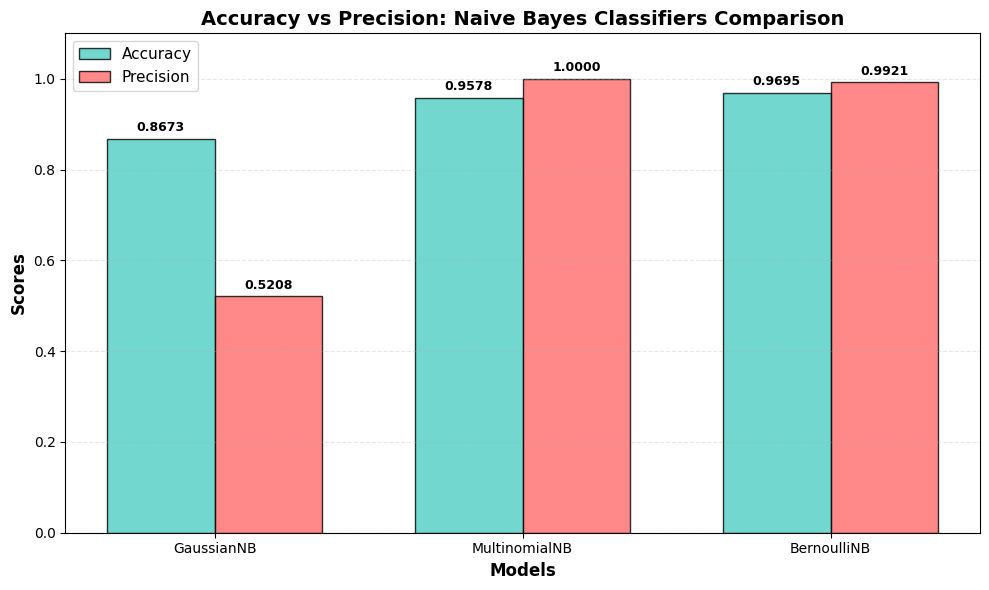

In [52]:
# Combined comparison using grouped bar chart
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='#4ECDC4', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, precisions, width, label='Precision', color='#FF6B6B', alpha=0.8, edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax.set_title('Accuracy vs Precision: Naive Bayes Classifiers Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim([0, 1.1])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

MULTINOMIAL NAIVE BAYES IS THE BEST PERFORMING MODEL

In [53]:
import pickle

In [54]:
pickle.dump(tf, open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))